# Gradient Boosting & XGBoost

## Gradient Boosting

Gradient Boosting, like Adaptive Boosting, is a technique that can easily be applied to any classifier or regressor. 

    Construct base learner of type f, F_0(theta, x, y) with loss function L(y, F(x))
    
    for t in (1,T):
        compute partial derivatives r' of loss function w.r.t. last learner, F_t-1 for all i: 1...n
        fit a weak learner on r': f_t(theta, x, r')
        find an optimum (lagrange) multiplier lambda on the loss function L(y, F_t-1 + lambda*f_t(theta, x, r'))
        add this learner to the new model: F_t = F_t-1 + lambda*f_t(theta, x, r')
   
The fundamental difference between gradient boosting and adaptive boosting is the fitting of subsequent stages of learners on the **gradient of the loss function**. Why?

The reasoning behind this is rather simple and hearkens back to basic calculus.

Suppose we are trying to make an estimate of the objective (loss plus regularization for model complexity) function $O$ at iteration t of the boost:

$$O_{t} = \sum_{i=1}^N L(y, F_{t-1}(x_i) + \lambda\ f_t(\theta, x_i, r')) + \Omega(f_t(\theta, x, r'))$$

Where the loss function is again $L$ and the complexity (regularization term) is $\Omega$. We take the Taylor expansion of a function f (any function, not just the weak learner) at two degrees of order:

$$f(x+\Delta\ x) \simeq f(x) + f'(x)\Delta x + \dfrac{1}{2}f''(x)\Delta x^2$$

About the previous estimator $F_{t-1}$:

$$L(y, F_{t-1}) + \partial_{F_{t-1}}L(y, F_{t-1})f_{t} + \dfrac{1}{2}\partial_{F_{t-1}}^2L(y, F_{t-1})f_{t}^2$$

Set 

$$ g_i = \partial_{F_{t-1}}L(y, F_{t-1}(x_i))$$

$$ h_i = \partial_{F_{t-1}}^2L(y, F_{t-1}(x_i))$$

This makes the first estimate of the objective function to be:

$$O_{t} = \sum_{i=1}^N [L(y, F_{t-1}(x_i)) + g_{i}f_t(x_i) + \dfrac{1}{2}h_{i}f_t(x_i)^2] + \Omega(h_t(\theta, x, r'))$$

This transformation benefits us because it has simplified the composite loss function in terms of an expansion of derivatives, which if we choose the right base loss function, can still be not too hard to find. Note that we also have to have the output of $f_t(x_i)$, the base learner, at this stage. 


## Graident Boosting Algorithm

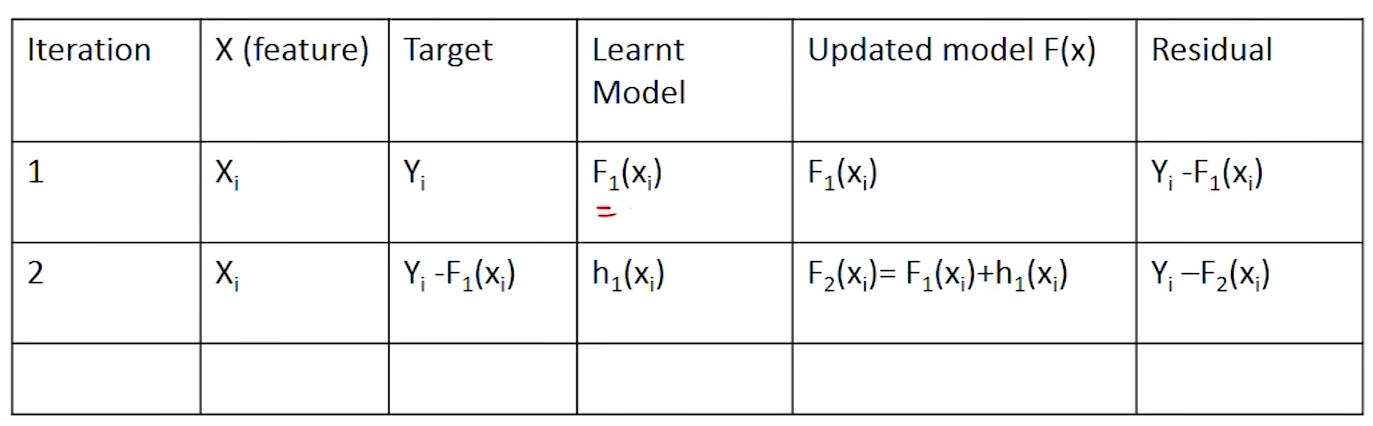

### Gradient notation: 

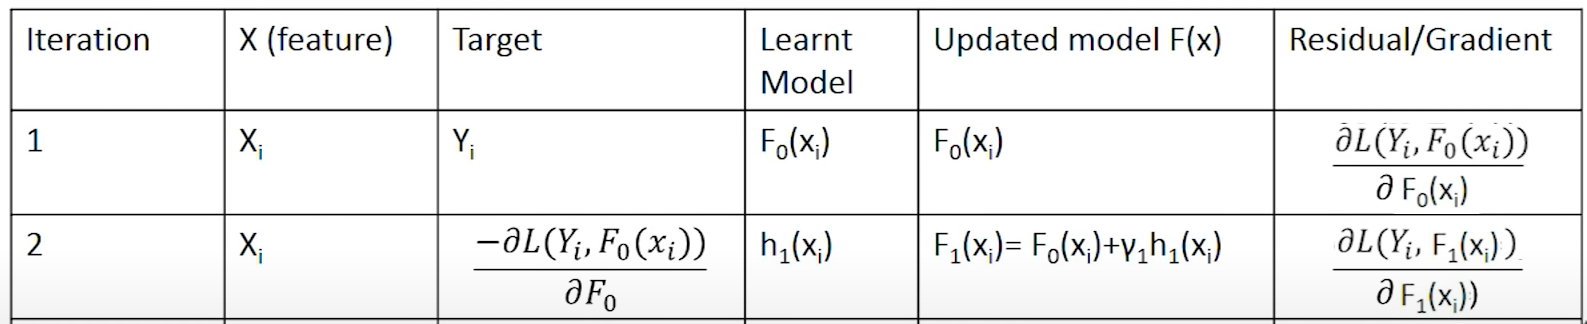

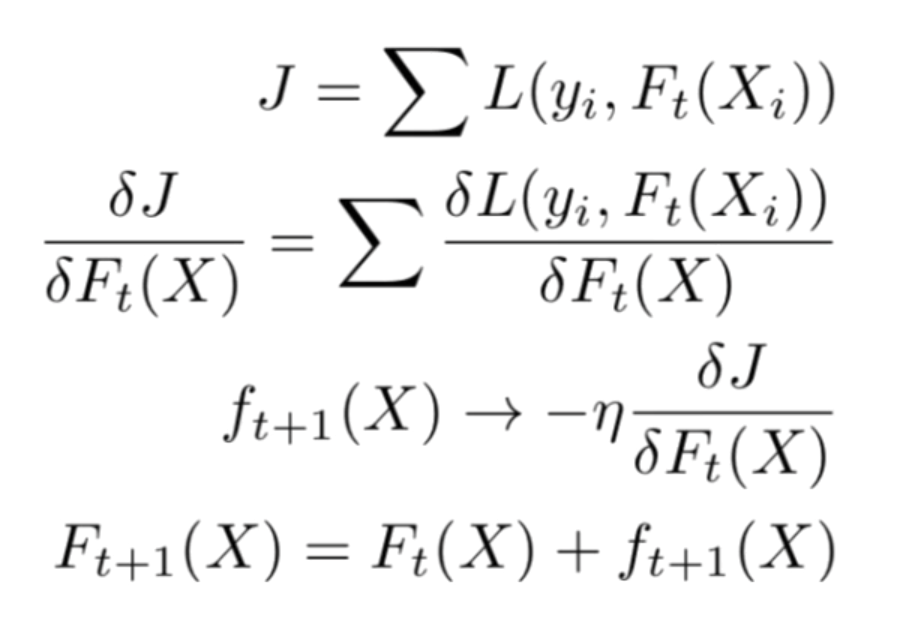

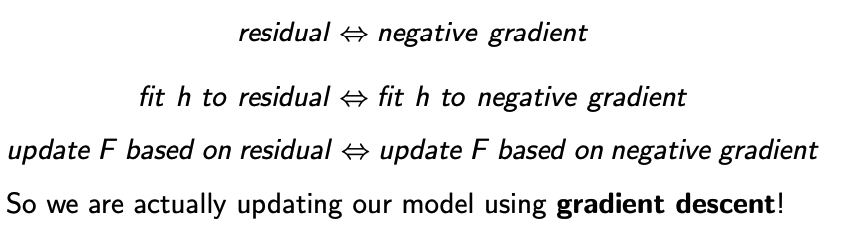

### The GBRT algorithm

    Construct base tree F_0(theta, x, y) with loss function L(y, F(x))
    
    for t in (1,T):
        Compute partial derivatives g_t, h_t with the needed loss function
        Construct tree f_t optimizing the structure score at each split
        Prune tree as necessary
        find an optimum (lagrange) multiplier lambda that minimizes RMSD error
        add f_t to the new model: F_t = F_t-1 + lambda*f_t(theta, x, r')
   

# XgBoost

- GBM does not have regularization so it is prone to overfitting.
- In order to correct this issue XGBoosting (EXtreme Gradient Boosting) was introduced that incorporates the regularization formalization in the loss function. 
- It uses block structure to support parallelization in tree construction and the ability to fit and boost new data added to a trained model. 
- It can efficiently reduce computing time and allocate an optimal usage of memory resources.

## Hyperparameters

- objective:
    - "reg:linear"
    - "binary:logistic"
    - "multi:softmax"
    
- learning rate (eta): default is 0.3

- gamma: min loss reduction to create a new split

- alpha: L1 reg on leaf weights

- lambda: L2 reg on leaf weights

- max_depth: max_depth per tree [default is 6]

- subsample: % of sample used per tree

- colsample_bytree: % of features used by tree

## Grid Search:

- Search exhaustively over a given set of hyperparameters, onnce per set of hyperparameters.
- 2 hyperparameter with 4 possible value of each, so total iterations will be 16.

```
from sklearn.model_selection import GridSeachCV

xgb_param_grid = {
    "learning_rate":[0.01, 0.1, 0.5],
    "n_estimators":[200],
    "subsample":[0.3, 0.5, 0.9]

}

model = xgb.XGBCClassifier()

grid = GridSearchCV(estimator=model,
                    param_grid=xgb_param_grid,
                    scoring="neg_cross_entropy_loss",
                    cv=4,
                    verbose=1)

grid.fit(X,y)
```

#  References
https://web.stanford.edu/~hastie/Papers/AdditiveLogisticRegression/alr.pdf   
https://statweb.stanford.edu/~jhf/ftp/trebst.pdf   